<h2 align="center">Automatic Machine Learning with H2O AutoML</h2>

### Task 2: Importing Packages

In [1]:
import pandas as pd
pd.options.display.max_rows = 999
import numpy as np
import matplotlib.pyplot as plt

### Task 3: Loading and Exploring the Data

In [2]:
xls = pd.ExcelFile('data/bank_term_deposit_marketing_analysis.xlsx')

In [3]:
xls.sheet_names

['PROCEDURE',
 'DATA DESCRIPTION',
 'Step 1 - Collect Information',
 'CLIENT_INFO',
 'LOAN_HISTORY',
 'MARKETING HISTORY',
 'SUBSCRIPTION HISTORY',
 'Step 2 - Merge Information',
 'CLIENT_MERGE',
 'Step 3 - Marketing Analysis',
 'DAILY RANGE',
 'JOB ANALYSIS',
 'Sheet3']

In [4]:
client_info = pd.read_excel(xls, 'CLIENT_INFO')
loan_history = pd.read_excel(xls, 'LOAN_HISTORY')
marketing_history = pd.read_excel(xls, 'MARKETING HISTORY')
subscription_history = pd.read_excel(xls, 'SUBSCRIPTION HISTORY')

In [5]:
client_info.head()

,ID,AGE,JOB,MARITAL,EDUCATION
0,2836,58,management,married,tertiary
1,2837,44,technician,single,secondary
2,2838,33,entrepreneur,married,secondary
3,2839,47,blue-collar,married,unknown
4,2840,33,unknown,single,unknown


In [6]:
loan_history.head()

,ID,DEFAULT,BALANCE,HOUSING,LOAN
0,2836,no,2143,yes,no
1,2837,no,29,yes,no
2,2838,no,2,yes,yes
3,2839,no,1506,yes,no
4,2840,no,1,no,no


In [7]:
marketing_history.head()

,ID,CONTACT,DAY,MONTH,DURATION,CAMPAIGN,PDAYS,PREVIOUS,POUTCOME
0,2836,unknown,5,may,261,1,-1,0,unknown
1,2837,unknown,5,may,151,1,-1,0,unknown
2,2838,unknown,5,may,76,1,-1,0,unknown
3,2839,unknown,5,may,92,1,-1,0,unknown
4,2840,unknown,5,may,198,1,-1,0,unknown


In [8]:
subscription_history.head()

,ID,TERM_DEPOSIT
0,2836,no
1,2837,no
2,2838,no
3,2839,no
4,2840,no


In [9]:
df = pd.merge(client_info, loan_history, on=['ID'])
df = pd.merge(df, marketing_history, on=['ID'])
df = pd.merge(df, subscription_history, on=['ID'])
df.head()

,ID,AGE,JOB,MARITAL,EDUCATION,DEFAULT,BALANCE,HOUSING,LOAN,CONTACT,DAY,MONTH,DURATION,CAMPAIGN,PDAYS,PREVIOUS,POUTCOME,TERM_DEPOSIT
0,2836,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,2837,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,2838,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,2839,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,2840,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [10]:
df = df.drop(['ID'], axis=1)

### Task 4: Data Prep & Start H2O

In [13]:
import h2o
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; OpenJDK 64-Bit Server VM (build 11.0.6+8-b765.1, mixed mode)
  Starting server from C:\Users\rauna\Anaconda3\lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\rauna\AppData\Local\Temp\tmp48q86dj7
  JVM stdout: C:\Users\rauna\AppData\Local\Temp\tmp48q86dj7\h2o_rauna_started_from_python.out
  JVM stderr: C:\Users\rauna\AppData\Local\Temp\tmp48q86dj7\h2o_rauna_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,07 secs
H2O_cluster_timezone:,Asia/Kolkata
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.1.3
H2O_cluster_version_age:,23 days
H2O_cluster_name:,H2O_from_python_rauna_fswlio
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.971 Gb
H2O_cluster_total_cores:,4
H2O_cluster_allowed_cores:,4
H2O_cluster_status:,"accepting new members, healthy"


In [14]:
h2o_df = h2o.H2OFrame(df)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [15]:
h2o_df.describe()

Rows:45211
Cols:17




,AGE,JOB,MARITAL,EDUCATION,DEFAULT,BALANCE,HOUSING,LOAN,CONTACT,DAY,MONTH,DURATION,CAMPAIGN,PDAYS,PREVIOUS,POUTCOME,TERM_DEPOSIT
type,int,enum,enum,enum,enum,int,enum,enum,enum,int,enum,int,int,int,int,enum,enum
mins,18.0,,,,,-8019.0,,,,1.0,,0.0,1.0,-1.0,0.0,,
mean,40.93621021432809,,,,,1362.272057685082,,,,15.806418791886935,,258.1630797814693,2.7638406582468984,40.1978279622216,0.5803233726305563,,
maxs,95.0,,,,,102127.0,,,,31.0,,4918.0,63.0,871.0,275.0,,
sigma,10.61876204097539,,,,,3044.7658291685234,,,,8.32247615304459,,257.5278122651711,3.0980208832791796,100.1287459905981,2.303441044931215,,
zeros,0,,,,,3514,,,,0,,3,0,0,36954,,
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,58.0,management,married,tertiary,no,2143.0,yes,no,unknown,5.0,may,261.0,1.0,-1.0,0.0,unknown,no
1,44.0,technician,single,secondary,no,29.0,yes,no,unknown,5.0,may,151.0,1.0,-1.0,0.0,unknown,no
2,33.0,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5.0,may,76.0,1.0,-1.0,0.0,unknown,no


In [16]:
train, test = h2o_df.split_frame(ratios=[.75])

# Identify predictors and response
x = train.columns
y = "TERM_DEPOSIT"
x.remove(y)

### Task 5: Run H2O AutoML

In [17]:
from h2o.automl import H2OAutoML

In [18]:
aml = H2OAutoML(max_runtime_secs=600,
                #exclude_algos=['DeepLearning'],
                seed=1,
                #stopping_metric='logloss',
                #sort_metric='logloss',
                balance_classes=False,
                project_name='Completed'
)
%time aml.train(x=x, y=y, training_frame=train)

AutoML progress: |
20:42:37.234: AutoML: XGBoost is not available; skipping it.

████████████████████████████████████████████████████████| 100%
Wall time: 9min 44s


### Task 6: AutoML Leaderboard and Ensemble Exploration

In [19]:
# View the AutoML Leaderboard
lb = aml.leaderboard
lb.head(rows=lb.nrows)  # Print all rows instead of default (10 rows)

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
StackedEnsemble_AllModels_AutoML_20201021_204237,0.935435,0.214805,0.621819,0.177772,0.254016,0.0645242
GBM_2_AutoML_20201021_204237,0.934182,0.20045,0.615471,0.165479,0.25049,0.0627454
GBM_5_AutoML_20201021_204237,0.93418,0.198728,0.617601,0.172333,0.249619,0.0623098
GBM_grid__1_AutoML_20201021_204237_model_3,0.933879,0.19894,0.618836,0.174065,0.249787,0.0623937
StackedEnsemble_BestOfFamily_AutoML_20201021_204237,0.933876,0.216077,0.616109,0.176986,0.254809,0.0649275
GBM_3_AutoML_20201021_204237,0.933594,0.202033,0.611351,0.159918,0.25201,0.063509
GBM_1_AutoML_20201021_204237,0.93339,0.200999,0.618008,0.180999,0.250556,0.0627782
GBM_grid__1_AutoML_20201021_204237_model_7,0.932832,0.201034,0.618152,0.17604,0.250397,0.0626985
GBM_grid__1_AutoML_20201021_204237_model_5,0.932567,0.202198,0.604436,0.170746,0.252571,0.0637922
GBM_grid__1_AutoML_20201021_204237_model_4,0.932235,0.201857,0.609264,0.182038,0.252288,0.0636491


In [20]:
# Get the "All Models" Stacked Ensemble model
se = aml.leader

# Get the Stacked Ensemble metalearner model
metalearner = h2o.get_model(se.metalearner()['name'])

In [21]:
metalearner.varimp()

[('XRT_1_AutoML_20201021_204237', 0.5236967879170805, 1.0, 0.3418696375479346),
 ('GBM_5_AutoML_20201021_204237',
  0.2858461804860537,
  0.5458238184407447,
  0.18660059097536705),
 ('DRF_1_AutoML_20201021_204237',
  0.23452994359294269,
  0.44783536772441873,
  0.15310131484509304),
 ('GBM_grid__1_AutoML_20201021_204237_model_3',
  0.2337999245350785,
  0.4464413949624934,
  0.15262475788222196),
 ('GBM_grid__1_AutoML_20201021_204237_model_4',
  0.09652122809452202,
  0.184307466307784,
  0.06300912670402029),
 ('GBM_2_AutoML_20201021_204237',
  0.06528883650567058,
  0.1246691559162438,
  0.04262059914649322),
 ('GBM_grid__1_AutoML_20201021_204237_model_8',
  0.054365690723394824,
  0.10381138853195107,
  0.03548996177076593),
 ('GBM_1_AutoML_20201021_204237',
  0.020615925682426463,
  0.039366148806111605,
  0.013458091024003435),
 ('DeepLearning_grid__3_AutoML_20201021_204237_model_2',
  0.01014215515788113,
  0.019366464320355898,
  0.006620806137785079),
 ('DeepLearning_grid__3_

### Task 7: Baselearner Model Exploration

In [23]:
#model = h2o.get_model('XGBoost_grid__1_AutoML_20200608_075205_model_2')
model = h2o.get_model('XRT_1_AutoML_20201021_204237')

In [24]:
model.model_performance(test)


ModelMetricsBinomial: drf
** Reported on test data. **

MSE: 0.0650882421659519
RMSE: 0.25512397411053295
LogLoss: 0.2135746495628558
Mean Per-Class Error: 0.13419799069489224
AUC: 0.9274975828508171
AUCPR: 0.607828599647797
Gini: 0.8549951657016341

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.32559590763460816: 


,,no,yes,Error,Rate
0,no,9116.0,807.0,0.0813,(807.0/9923.0)
1,yes,366.0,967.0,0.2746,(366.0/1333.0)
2,Total,9482.0,1774.0,0.1042,(1173.0/11256.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.325596,0.622465,191.0
1,max f2,0.181444,0.731147,255.0
2,max f0point5,0.404692,0.594836,160.0
3,max accuracy,0.469115,0.904940,135.0
4,max precision,0.966040,1.000000,0.0
5,max recall,0.000075,1.000000,399.0
6,max specificity,0.966040,1.000000,0.0
7,max absolute_mcc,0.325596,0.571172,191.0
8,max min_per_class_accuracy,0.206552,0.860465,242.0
9,max mean_per_class_accuracy,0.155170,0.865802,269.0



Gains/Lift Table: Avg response rate: 11.84 %, avg score: 13.72 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010039,0.794229,6.800125,6.800125,0.805310,0.852996,0.805310,0.852996,0.068267,0.068267,580.012481,580.012481,0.066050
1,2,0.020078,0.729665,6.426492,6.613308,0.761062,0.763075,0.783186,0.808035,0.064516,0.132783,542.649158,561.330819,0.127845
2,3,0.030028,0.682450,5.202176,6.145714,0.616071,0.706096,0.727811,0.774256,0.051763,0.184546,420.217554,514.571394,0.175275
3,4,0.040068,0.638499,5.380319,5.953941,0.637168,0.660419,0.705100,0.745734,0.054014,0.238560,438.031853,495.394081,0.225156
4,5,0.050018,0.606721,5.126782,5.789391,0.607143,0.623515,0.685613,0.721420,0.051013,0.289572,412.678170,478.939051,0.271735
5,6,0.100036,0.458035,4.529523,5.159457,0.536412,0.530851,0.611012,0.626136,0.226557,0.516129,352.952314,415.945683,0.471989
6,7,0.150053,0.338583,3.674613,4.664509,0.435169,0.395539,0.552398,0.549270,0.183796,0.699925,267.461315,366.450893,0.623738
7,8,0.200071,0.244408,2.324755,4.079571,0.275311,0.290518,0.483126,0.484582,0.116279,0.816204,132.475526,307.957051,0.698901
8,9,0.300018,0.121686,1.200940,3.120595,0.142222,0.174945,0.369559,0.381431,0.120030,0.936234,20.094024,212.059537,0.721682
9,10,0.400053,0.067689,0.367461,2.432159,0.043517,0.091991,0.288030,0.309055,0.036759,0.972993,-63.253869,143.215901,0.649905


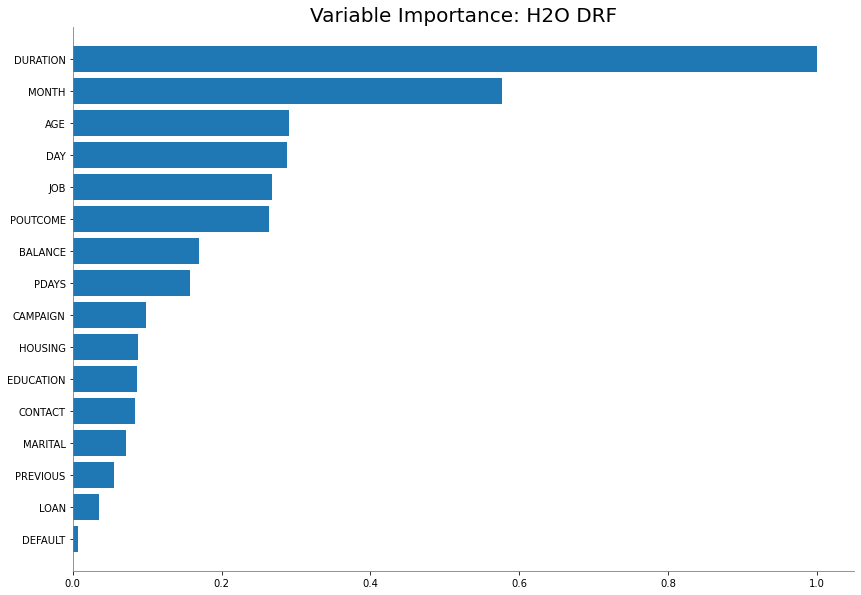

In [25]:
model.varimp_plot(num_of_features=20)

PartialDependencePlot progress: |█████████████████████████████████████████| 100%


C:\Users\rauna\Anaconda3\lib\site-packages\h2o\model\model_base.py:1365: MatplotlibDeprecationWarning: The parameter where must have the same size as x in fill_between(). This will become an error in future versions of Matplotlib.
  axs.fill_between(x, lower, upper, where=lower < upper, alpha=0.1, interpolate=False)


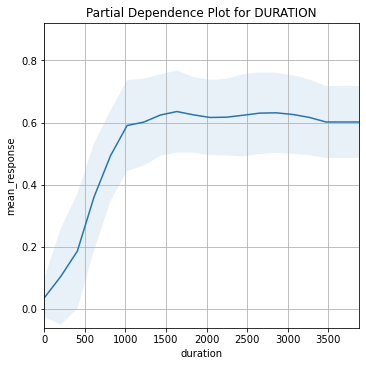

In [26]:
model.partial_plot(train, cols=["DURATION"], figsize=(5,5));

In [ ]:
# save the model
model_path = h2o.save_model(model=model, path='/home/rhyme/Desktop/Project/', force=True)
print(model_path)

### (Optional) Correlation Analysis

In [24]:
copy = df.copy()
copy.head()

,AGE,JOB,MARITAL,EDUCATION,DEFAULT,BALANCE,HOUSING,LOAN,CONTACT,DAY,MONTH,DURATION,CAMPAIGN,PDAYS,PREVIOUS,POUTCOME,TERM_DEPOSIT
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [25]:
bin_labels = ['bin1', 'bin2', 'bin3', 'bin4']
copy[['AGE','BALANCE','DAY','DURATION']] = copy[['AGE','BALANCE','DAY','DURATION']].transform(lambda x: pd.qcut(x, q=4, labels=bin_labels))

In [26]:
copy['CAMPAIGN'] = pd.qcut(copy.CAMPAIGN, q=4, duplicates='drop', labels=bin_labels[:3])

In [27]:
copy['PDAYS'] = pd.qcut(copy.PDAYS, q=4, duplicates='drop', labels=bin_labels[:1])

In [28]:
copy['PREVIOUS'] = pd.qcut(copy.PREVIOUS, q=4, duplicates='drop', labels=bin_labels[:1])

In [29]:
copy.head()

,AGE,JOB,MARITAL,EDUCATION,DEFAULT,BALANCE,HOUSING,LOAN,CONTACT,DAY,MONTH,DURATION,CAMPAIGN,PDAYS,PREVIOUS,POUTCOME,TERM_DEPOSIT
0,bin4,management,married,tertiary,no,bin4,yes,no,unknown,bin1,may,bin3,bin1,bin1,bin1,unknown,no
1,bin3,technician,single,secondary,no,bin1,yes,no,unknown,bin1,may,bin2,bin1,bin1,bin1,unknown,no
2,bin1,entrepreneur,married,secondary,no,bin1,yes,yes,unknown,bin1,may,bin1,bin1,bin1,bin1,unknown,no
3,bin3,blue-collar,married,unknown,no,bin4,yes,no,unknown,bin1,may,bin1,bin1,bin1,bin1,unknown,no
4,bin1,unknown,single,unknown,no,bin1,no,no,unknown,bin1,may,bin3,bin1,bin1,bin1,unknown,no


In [30]:
copy_oh = pd.get_dummies(copy)
copy_oh.head()

,AGE_bin1,AGE_bin2,AGE_bin3,AGE_bin4,JOB_admin.,JOB_blue-collar,JOB_entrepreneur,JOB_housemaid,JOB_management,JOB_retired,...,CAMPAIGN_bin2,CAMPAIGN_bin3,PDAYS_bin1,PREVIOUS_bin1,POUTCOME_failure,POUTCOME_other,POUTCOME_success,POUTCOME_unknown,TERM_DEPOSIT_no,TERM_DEPOSIT_yes
0,0,0,0,1,0,0,0,0,1,0,...,0,0,1,1,0,0,0,1,1,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,1,1,0
2,1,0,0,0,0,0,1,0,0,0,...,0,0,1,1,0,0,0,1,1,0
3,0,0,1,0,0,1,0,0,0,0,...,0,0,1,1,0,0,0,1,1,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,1,1,0


In [31]:
copy_oh.corr()['TERM_DEPOSIT_yes'].sort_values(ascending=False)[1:]

DURATION_bin4          0.317877
POUTCOME_success       0.306788
HOUSING_no             0.139173
CONTACT_cellular       0.135873
MONTH_mar              0.129456
MONTH_oct              0.128531
MONTH_sep              0.123185
BALANCE_bin4           0.080023
JOB_retired            0.079245
JOB_student            0.076897
MONTH_dec              0.075164
LOAN_no                0.068185
EDUCATION_tertiary     0.066448
MONTH_apr              0.065392
CAMPAIGN_bin1          0.065117
MARITAL_single         0.063526
MONTH_feb              0.038417
AGE_bin1               0.038166
DAY_bin2               0.036935
JOB_management         0.032919
POUTCOME_other         0.031955
AGE_bin4               0.028255
DEFAULT_no             0.022419
JOB_unemployed         0.020390
BALANCE_bin3           0.014679
CONTACT_telephone      0.014042
EDUCATION_unknown      0.012053
DAY_bin1               0.011379
POUTCOME_failure       0.009885
JOB_admin.             0.005637
DAY_bin4               0.005579
MARITAL_

In [32]:
results, bin_edges = pd.qcut(df.DURATION, q=4, labels=bin_labels, retbins=True)

In [33]:
bin_edges

array([   0.,  103.,  180.,  319., 4918.])

In [ ]:
#Strategy: Reach out to customers whose last contact duration was >= 319 or POUTCOME = success